<a href="https://colab.research.google.com/github/ikadeksandratiana/DataAnalytics/blob/main/SeaBorn_Tugas4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/My Drive/Kaggle"
# /content/gdrive/My Drive/Kaggle is the path where kaggle.json is present in the Google Drive

In [3]:
#changing the working directory
%cd /content/gdrive/My Drive/Kaggle
#Check the present working directory using pwd command

/content/gdrive/My Drive/Kaggle


In [4]:
!kaggle datasets download -d terenceshin/covid19s-impact-on-airport-traffic

  0% 0.00/125k [00:00<?, ?B/s]
100% 125k/125k [00:00<00:00, 16.3MB/s]


In [5]:
#unzipping the zip files and deleting the zip files
!unzip \*.zip  && rm *.zip

Archive:  covid19s-impact-on-airport-traffic.zip
  inflating: covid_impact_on_airport_traffic.csv  


In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot  as plt
import plotly.express as px
import plotly.graph_objects as go
%matplotlib inline

In [7]:
df = pd.read_csv(r'covid_impact_on_airport_traffic.csv')

In [8]:
df.head()

,AggregationMethod,Date,Version,AirportName,PercentOfBaseline,Centroid,City,State,ISO_3166_2,Country,Geography
0,Daily,2020-04-03,1.0,Kingsford Smith,64,POINT(151.180087713813 -33.9459774986125),Sydney,New South Wales,AU,Australia,"POLYGON((151.164354085922 -33.9301772341877, 1..."
1,Daily,2020-04-13,1.0,Kingsford Smith,29,POINT(151.180087713813 -33.9459774986125),Sydney,New South Wales,AU,Australia,"POLYGON((151.164354085922 -33.9301772341877, 1..."
2,Daily,2020-07-10,1.0,Kingsford Smith,54,POINT(151.180087713813 -33.9459774986125),Sydney,New South Wales,AU,Australia,"POLYGON((151.164354085922 -33.9301772341877, 1..."
3,Daily,2020-09-02,1.0,Kingsford Smith,18,POINT(151.180087713813 -33.9459774986125),Sydney,New South Wales,AU,Australia,"POLYGON((151.164354085922 -33.9301772341877, 1..."
4,Daily,2020-10-31,1.0,Kingsford Smith,22,POINT(151.180087713813 -33.9459774986125),Sydney,New South Wales,AU,Australia,"POLYGON((151.164354085922 -33.9301772341877, 1..."


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7247 entries, 0 to 7246
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   AggregationMethod  7247 non-null   object 
 1   Date               7247 non-null   object 
 2   Version            7247 non-null   float64
 3   AirportName        7247 non-null   object 
 4   PercentOfBaseline  7247 non-null   int64  
 5   Centroid           7247 non-null   object 
 6   City               7247 non-null   object 
 7   State              7247 non-null   object 
 8   ISO_3166_2         7247 non-null   object 
 9   Country            7247 non-null   object 
 10  Geography          7247 non-null   object 
dtypes: float64(1), int64(1), object(9)
memory usage: 622.9+ KB


In [10]:
df.describe()

,Version,PercentOfBaseline
count,7247.0,7247.000000
mean,1.0,66.651442
std,0.0,22.134433
min,1.0,0.000000
25%,1.0,53.000000
50%,1.0,67.000000
75%,1.0,84.000000
max,1.0,100.000000


In [11]:
df.duplicated().sum()

0

In [12]:
df.rename(columns=lambda x:x.strip().lower(),inplace=True)

In [13]:
df.date=pd.to_datetime(df.date)

In [14]:
days={0:'Monday',1:'Tuesday',2:'Wednesday',3:'Thursday',4:"Friday",5:'Saturday',6:'Sunday'}

In [15]:
df['weekday']=df.date.apply(lambda x:days.get(x.weekday()))
# make a new coulmn

In [16]:
df.date.apply(lambda x:x.month).value_counts()

10    868
7     862
5     855
9     835
8     835
11    835
6     831
4     825
3     445
12     56
Name: date, dtype: int64

In [17]:
df.country.value_counts()

United States of America (the)    4441
Canada                            2311
Australia                          257
Chile                              238
Name: country, dtype: int64

In [18]:
df.state.value_counts()

New York             523
California           523
Ontario              521
Quebec               519
Alberta              497
Georgia              262
Texas                262
Massachusetts        261
Virginia             261
Nevada               261
New Jersey           261
North Carolina       261
Michigan             261
Washington           261
Illinois             261
Hawaii               261
Florida              261
Colorado             261
Manitoba             261
British Columbia     261
New South Wales      257
Nova Scotia          252
Santiago Province    238
Name: state, dtype: int64

In [19]:
df.city.value_counts()

New York               523
College Park           262
Grapevine              262
Dorval                 262
Los Angeles            262
Denver                 261
Floris                 261
Paradise               261
Newark                 261
Charlotte              261
Romulus                261
Boston                 261
Chicago                261
Urban Honolulu         261
SeaTac                 261
Miami Springs          261
South San Francisco    261
Mississauga            261
Winnipeg               261
Richmond               261
Calgary                261
Hamilton               260
Mirabel                257
Sydney                 257
Halifax                252
Santiago               238
Leduc County           236
Name: city, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


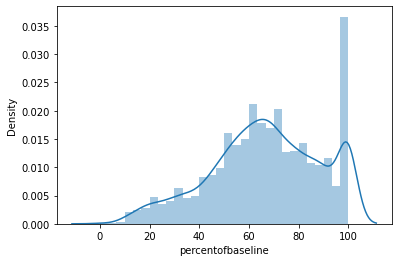

In [20]:
sns.distplot(df.percentofbaseline,bins=30)

In [21]:
df.date.apply(lambda x:days.get(x.weekday())).value_counts()

Wednesday    1064
Tuesday      1064
Monday       1040
Thursday     1036
Friday       1034
Saturday     1015
Sunday        994
Name: date, dtype: int64

In [22]:
px.bar(y=df.weekday.value_counts().values,
       x=df.weekday.value_counts().index)

In [23]:
px.box(df,y='percentofbaseline',x=df.date.apply(lambda x:days.get(x.weekday())))

In [24]:
px.bar(y=df.date.apply(lambda x:x.month).value_counts().values,
       x=df.date.apply(lambda x:x.month).value_counts().index)

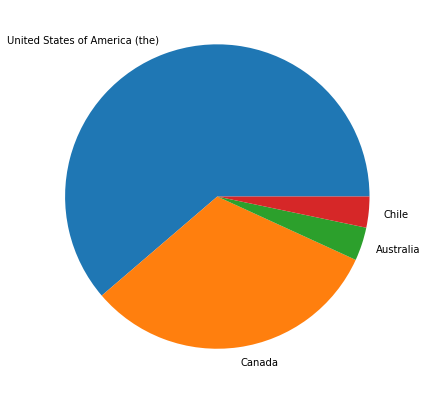

In [25]:
plt.figure(figsize=[7,7])
plt.pie(df.country.value_counts().values,labels=df.country.value_counts().index);

In [26]:
df.head()

,aggregationmethod,date,version,airportname,percentofbaseline,centroid,city,state,iso_3166_2,country,geography,weekday
0,Daily,2020-04-03,1.0,Kingsford Smith,64,POINT(151.180087713813 -33.9459774986125),Sydney,New South Wales,AU,Australia,"POLYGON((151.164354085922 -33.9301772341877, 1...",Friday
1,Daily,2020-04-13,1.0,Kingsford Smith,29,POINT(151.180087713813 -33.9459774986125),Sydney,New South Wales,AU,Australia,"POLYGON((151.164354085922 -33.9301772341877, 1...",Monday
2,Daily,2020-07-10,1.0,Kingsford Smith,54,POINT(151.180087713813 -33.9459774986125),Sydney,New South Wales,AU,Australia,"POLYGON((151.164354085922 -33.9301772341877, 1...",Friday
3,Daily,2020-09-02,1.0,Kingsford Smith,18,POINT(151.180087713813 -33.9459774986125),Sydney,New South Wales,AU,Australia,"POLYGON((151.164354085922 -33.9301772341877, 1...",Wednesday
4,Daily,2020-10-31,1.0,Kingsford Smith,22,POINT(151.180087713813 -33.9459774986125),Sydney,New South Wales,AU,Australia,"POLYGON((151.164354085922 -33.9301772341877, 1...",Saturday


In [27]:
fig=px.box(df,y='percentofbaseline',x='country')
fig.update_traces(marker_color='lightskyblue',marker_line_color='lightblue')

In [28]:
df["lon"]=df.centroid.apply(lambda x:x.split()[0].replace('POINT(',' '))
df["lat"]=df.centroid.apply(lambda x:x.split()[1].replace(')',' '))

In [29]:
fig_map = go.Figure(data=[
    go.Scattergeo(lat=df['lat'],
             lon=df['lon'],
             mode='markers',
             hoverinfo='text',
             marker=dict(color="darkred", size=5, opacity=0.9))
])
fig_map.update_geos(
    landcolor='white',
    showocean=True,
    oceancolor='white',
    lakecolor='blue',
)
fig_map.update_layout(
    width=800,
    height=400,
    template="plotly_white",
    margin=dict(r=0, t=0, b=0, l=0),
    annotations=[
        dict(
            text="",
            showarrow=False,
            xref="paper",
            yref="paper",
            x=0,
            y=0)
    ])

fig_map.show()